In [3]:
from sympy import *
from sympy.abc import u, v, e
from sympy import init_printing
import sympy
init_printing() 

from scipy.special import comb
from IPython.display import display

In [4]:
# calcs prob of player winning game with n people in it (incl. them)
# assuming player beats all with prob. p
def get_win_probs(n, p):
    probs = [None for _ in range(n)]
    probs[1] = 1
    probs[2] = p
    
    for i in range(3, n):
        new_prob = Rational(1, i) * Pow(p, i-1) # picked as prince and wins
        
        for j in range(1, i): # prob of transitioning to j-player game
            # not picked as prince and prince beats  other people
            new_prob += Rational(i-1, i) * p * Rational(1, int(2**(i-2))) * int(comb(i-2, j-1)) * probs[j]
            
        probs[i] = new_prob.expand()
            
    return probs

3


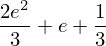

4


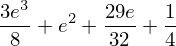

In [5]:
n = 5
u = Rational(1,2) + e
v = Rational(1,2) - e
wprobs = get_win_probs(n, u)
for i in range(3, n):
    print(i)
    display(wprobs[i])

In [6]:
# calcs prob of player winning game assuming
# 1. game starts with n players total, they are not prince
# 2. prince throws to them and doesn't beat everyone else
# 3. prince wins each match with prob. p0, player wins each match with prob p
# Base case is n = 3, which is just (1-p0)p (prince loses)

# I checked for n = 4 and it's right. 
def get_probs(n, p, p0):
    win_probs = get_win_probs(n, p)
    probs = [None for _ in range(n)]
    probs[3] = (1 - p0) * win_probs[2]
    
    for i in range(4, n):
        new_prob = 0
        for j in range(2, i): # prob of transitioning from i-player game to j-player game
            to_beat = max(0, i-j-1)
            new_prob += int(comb(i-2, to_beat)) * (p0 ** to_beat) * (1-p0) ** (i-2-to_beat) * win_probs[j]
            
        probs[i] = new_prob.expand()
    return probs

3


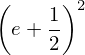

4


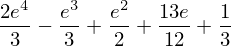

In [7]:
n = 5
u = Rational(1,2) + e
v = Rational(1,2) - e
probs = get_probs(n, u, v)
for i in range(3, n):
    print(i)
    display(probs[i])

In [8]:
def get_diffs(n, u, v):
    diffs = [None for _ in range(n)]
    
    higher = get_probs(n, u, v)
    lower = get_probs(n, v, u)
    
    for i in range(3, n):
        diffs[i] = (higher[i] - lower[i]).expand()
    return diffs

3


4


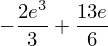

5


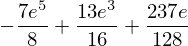

6


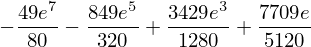

7


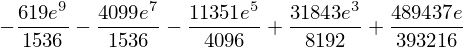

8


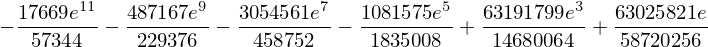

9


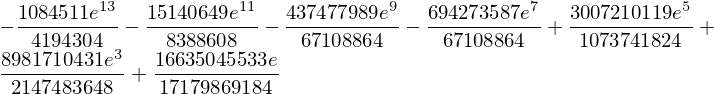

In [9]:
n = 10
u = Rational(1,2) + e
v = Rational(1,2) - e
diffs = get_diffs(n, u, v)
for i in range(3, n):
    print(i)
    display(diffs[i])

In [20]:
def get_Gs(n, u, v):
    Gs = [None for _ in range(n)]
    diffs = get_diffs(n, u, v)
    
    # assumed u = 1/2 + eps
    Gs[3] = (Rational(1, 3) * u * diffs[3]).expand()
    
    for i in range(4, n):
        
        G = Rational(1, i) * u * diffs[i]
        
        for j in range(3, i-1):
            G += Rational(i-2, i) * int(comb(i-3, i-j+1)) * Rational(1, 2 ** (i-3)) * Gs[j] 
            
        Gs[i] = G.expand()
    
    return Gs

3


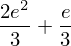

4


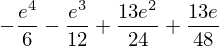

5


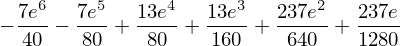

6


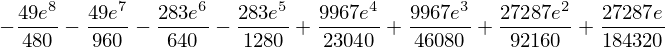

7


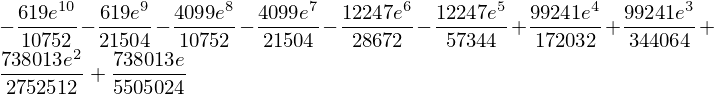

8


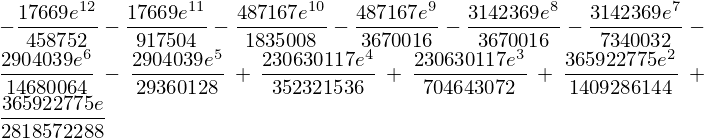

9


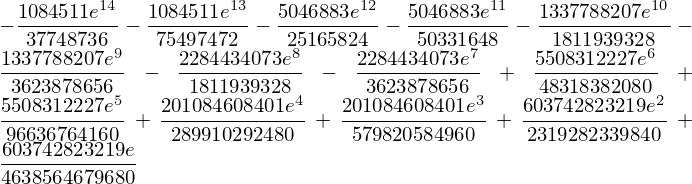

10


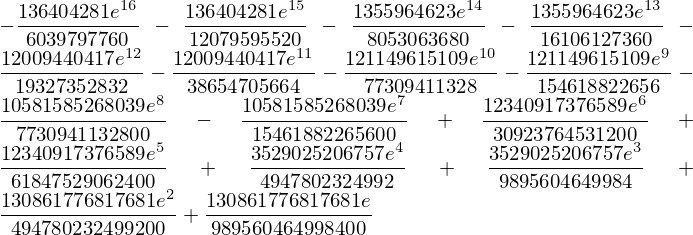

11


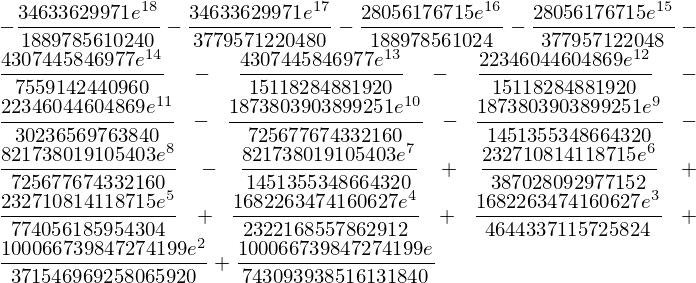

12


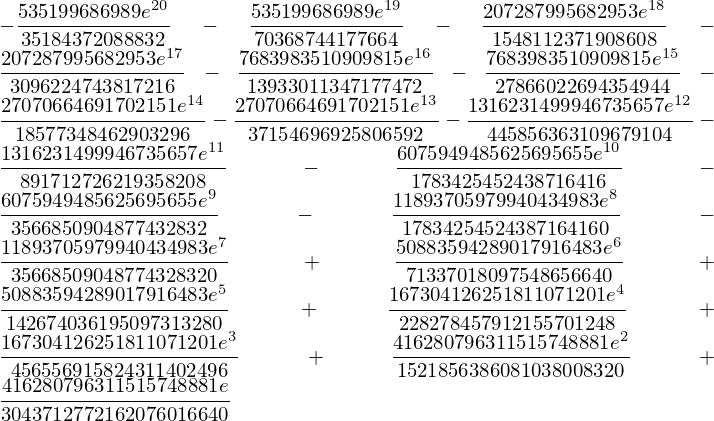

13


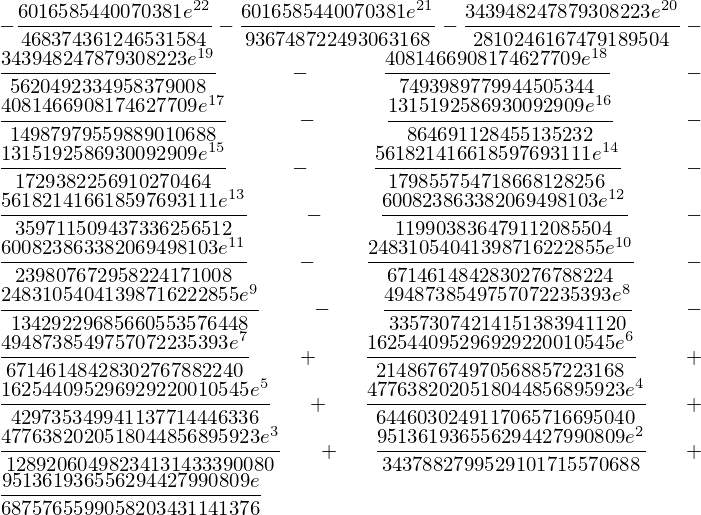

14


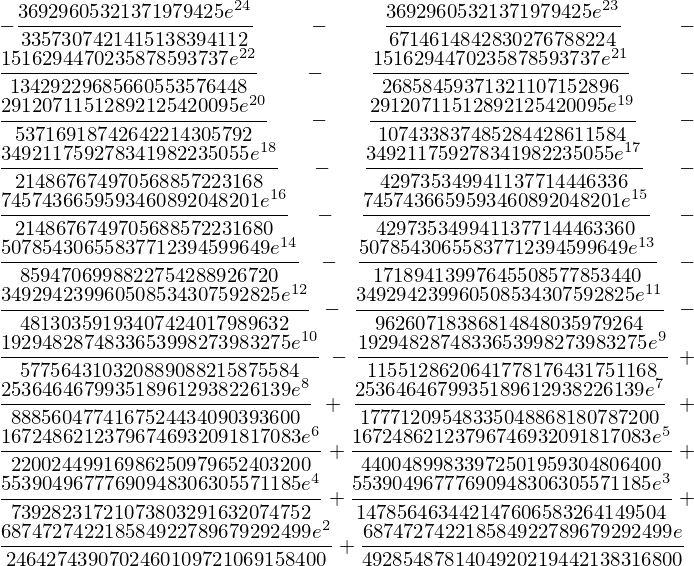

15


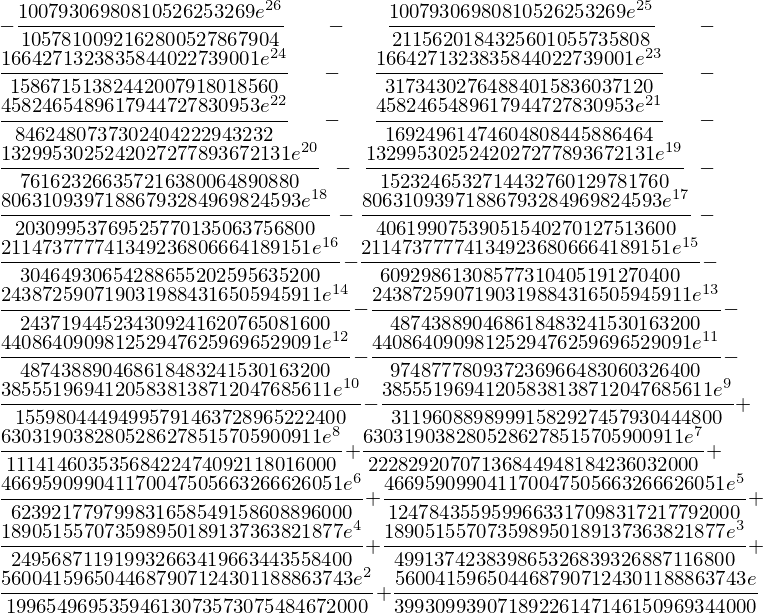

16


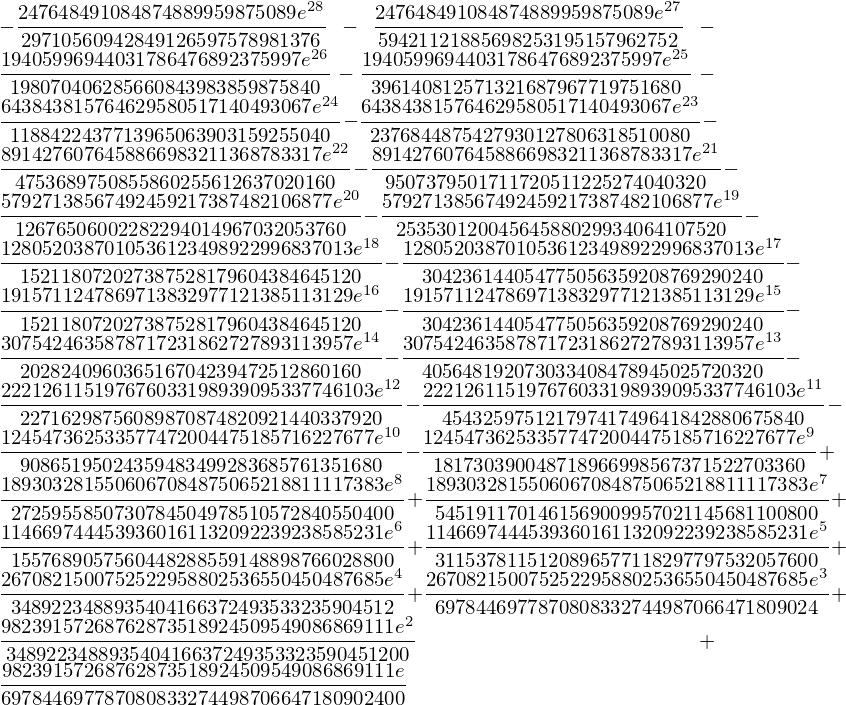

17


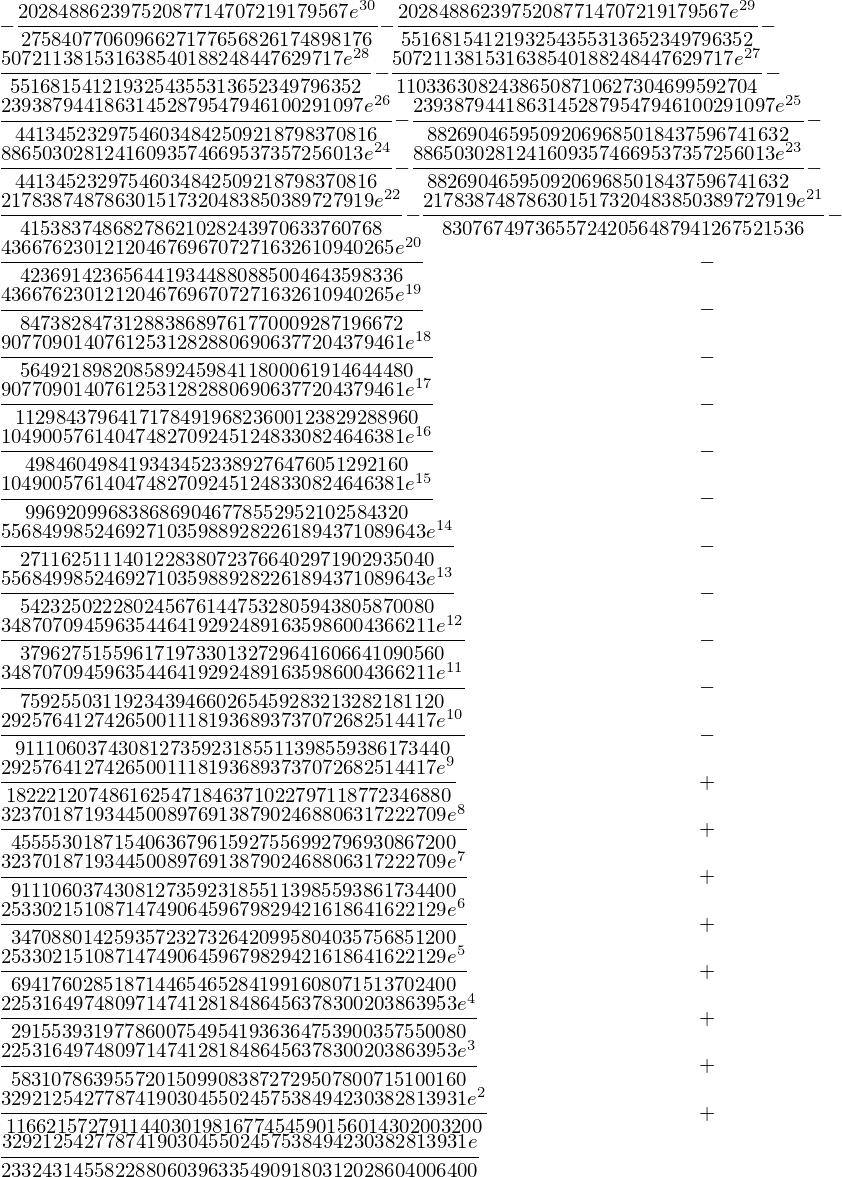

18


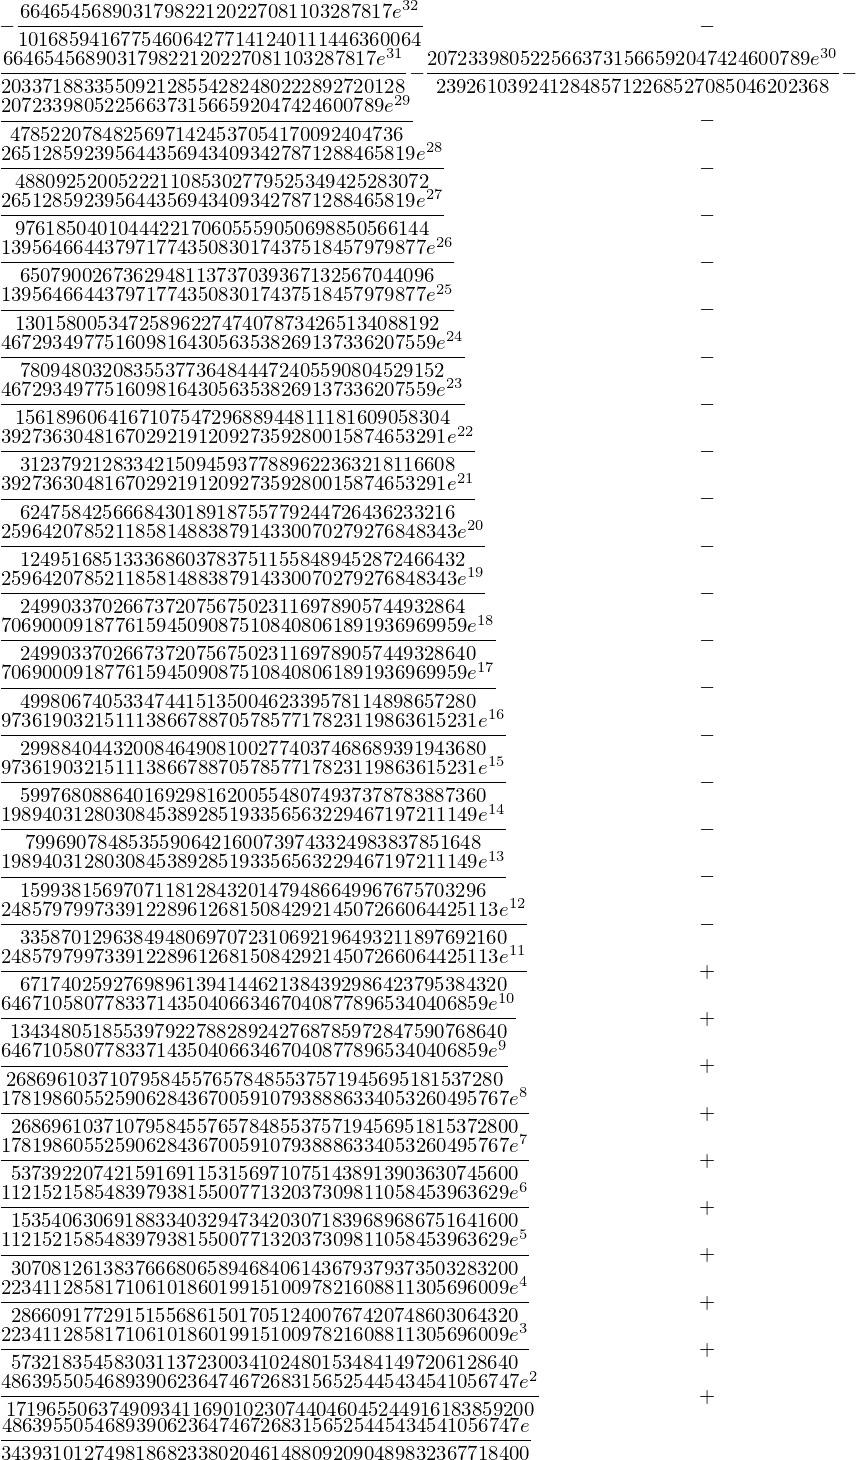

19


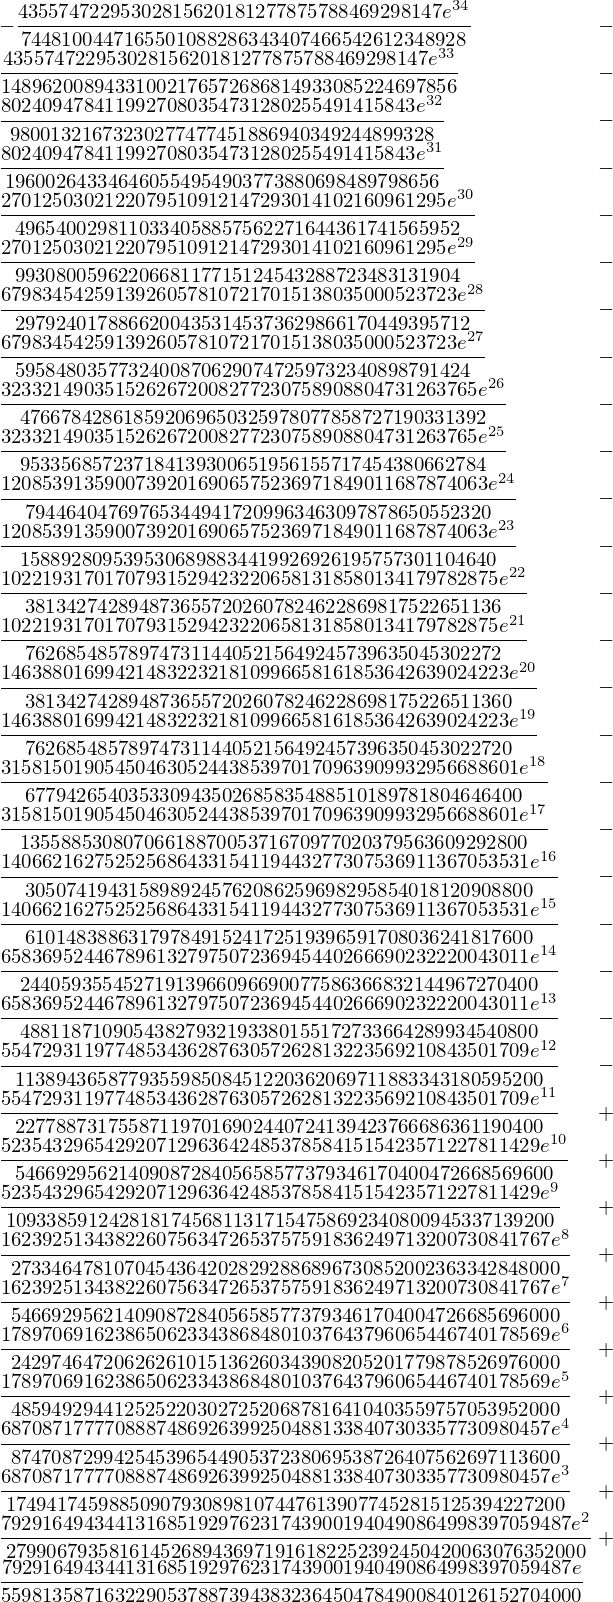

In [22]:
# Quick visual inspection shows that these terms are maximized when e = 0.5.
# (Proof for n=4 to 8? Only have to do it for up to 8 anyway.)

n = 20
u = Rational(1,2) + e
v = Rational(1,2) - e
Gs = get_Gs(n, u, v)
for i in range(3, n):
    print(i)
    display(Gs[i])
    display(Gs[i].evalf(subs={e:'0.5'}))